# **Imported Libraries**

In [2]:
# All the imports!
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from tensorflow import keras
# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

# **Importing The Fashion_mnist Dataset**

In [3]:
#import the fashion mnist dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


# **Preprocessing The Data**

In [4]:
# A good rule of thumb is to normalise input values - i.e. transform them to a
# scale of 0 to 1. Each element in this dataset is a pixel value of 0 to 255, so
# we'll normalise / rescale these values.

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
#We are expecting 60000 training images and 10000 test images.
#where each image is comprised of 28x28 greyscale pixel values.
#In addition we have the classes to which each image belongs.

print("Shape of Training Image Data: " + str(train_images.shape))
print("Shape of Training Class Data: " + str(train_labels.shape))
print("Shape of Test Image Data: " + str(test_images.shape))
print("Shape of Test Class Data: " + str(test_labels.shape))


Shape of Training Image Data: (60000, 28, 28)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28)
Shape of Test Class Data: (10000,)


In [6]:
#all available labels in the dataset 0-9 categories!

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# Print the number of training and test datasets
print(train_images.shape[0], 'train set')
print(test_images.shape[0], 'test set')

60000 train set
10000 test set


#plotting one image of train images


y = 1 Trouser


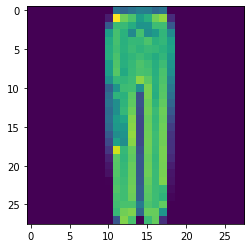

In [9]:
#between 0 and 59,999
img_index = 1000
label_index = train_labels[img_index]
print ("y = " + str(label_index) + " " +(class_names[label_index]))
plt.imshow(train_images[img_index])


#making a colorbar to see the colors values of the pixels index





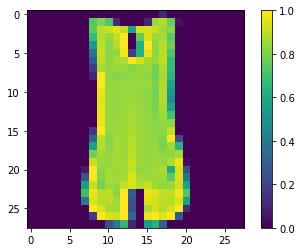

In [10]:
#making a colorbar to see the colors values of the pixels index

plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.show()

# **Visualise first 25 images from training data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


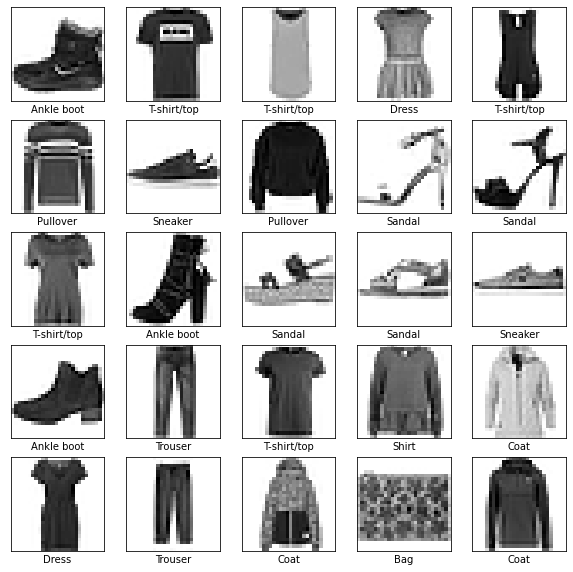

In [11]:
#size: 25 * 25 
#pixels: 28 * 28
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap=plt.cm.binary) #black and white
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# **Reshaping The Train and Test Data**

In [13]:
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1) # 1 for 1 channel
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Create and build Convolutional Neural **NetworK**

In [14]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [15]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', strides=(1,1), input_shape=(28,28,1))) # kernal size 3*3 filter
model.add(Conv2D(filters=32, kernel_size=3, padding='same', strides=(1,1) , activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=(1,1) , activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6

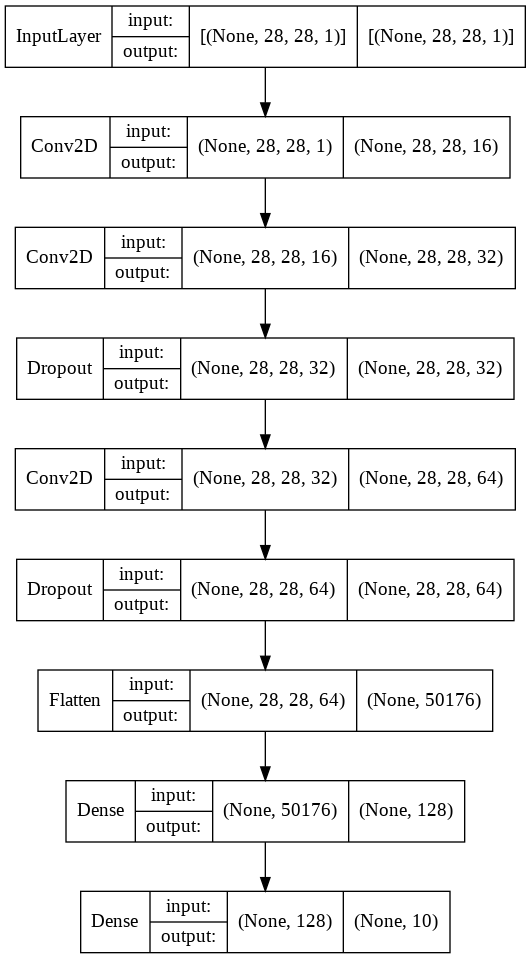

In [16]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [17]:
model.compile(optimizer='adam' 
, loss='sparse_categorical_crossentropy' #reduce loss specially in fashion
 , metrics=['accuracy'] )

In [18]:
 history = model.fit(train_images , train_labels , epochs=10 , batch_size=128 , validation_split=0.2 ,verbose=1)

Epoch 1/10
375/375 [==============================] - 17s 16ms/step - loss: 0.4322 - accuracy: 0.8436 - val_loss: 0.3080 - val_accuracy: 0.8911
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2663 - accuracy: 0.9022 - val_loss: 0.2527 - val_accuracy: 0.9084
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2033 - accuracy: 0.9250 - val_loss: 0.2322 - val_accuracy: 0.9164
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1651 - accuracy: 0.9383 - val_loss: 0.2203 - val_accuracy: 0.9213
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1311 - accuracy: 0.9512 - val_loss: 0.2374 - val_accuracy: 0.9198
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1021 - accuracy: 0.9626 - val_loss: 0.2292 - val_accuracy: 0.9263
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0798 - accuracy: 0.9695 - val_loss: 0.2596 - val_accuracy: 0.920

In [19]:
train_loss, train_accuracy = model.evaluate(train_images, train_labels, batch_size=256)
train_accuracy

235/235 [==============================] - 2s 7ms/step - loss: 0.0772 - accuracy: 0.9811


0.981083333492279

In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=256)
test_accuracy

40/40 [==============================] - 0s 8ms/step - loss: 0.3505 - accuracy: 0.9176


0.9175999760627747

In [21]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1), input_shape=(28,28,1))) # kernal size 3*3 filter
model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=(1,1) , activation='relu'))
model.add(MaxPooling2D(pool_size=2)) # 14 * 14
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', strides=(1,1) , activation='relu'))
model.add(MaxPooling2D(pool_size=2))# 7*7
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

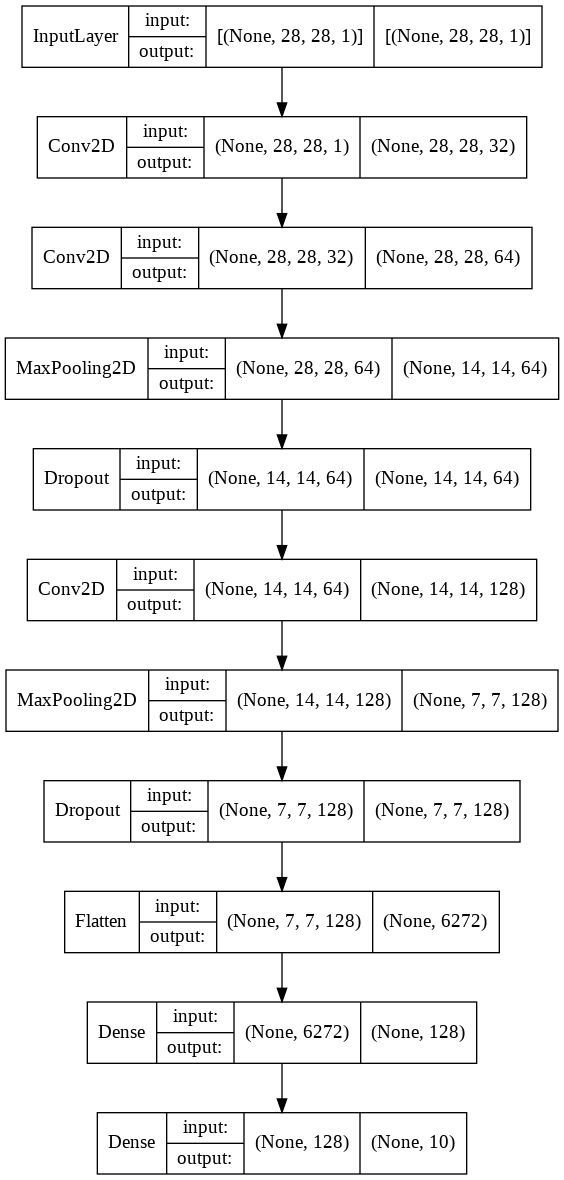

In [22]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [24]:
model.compile(optimizer='adam' 
, loss='sparse_categorical_crossentropy' #reduce loss specially in fashion
 , metrics=['accuracy'] )

In [25]:
 history = model.fit(train_images , train_labels , epochs=10 , batch_size=128 , validation_split=0.2 ,verbose=1)

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.5503 - accuracy: 0.7982 - val_loss: 0.3639 - val_accuracy: 0.8726
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3457 - accuracy: 0.8744 - val_loss: 0.2760 - val_accuracy: 0.9003
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2921 - accuracy: 0.8931 - val_loss: 0.2521 - val_accuracy: 0.9057
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2624 - accuracy: 0.9033 - val_loss: 0.2311 - val_accuracy: 0.9171
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2395 - accuracy: 0.9113 - val_loss: 0.2227 - val_accuracy: 0.9177
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2220 - accuracy: 0.9187 - val_loss: 0.2157 - val_accuracy: 0.9200
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2116 - accuracy: 0.9209 - val_loss: 0.2092 - val_accuracy: 0.9207

In [26]:
train_loss, train_accuracy = model.evaluate(train_images, train_labels, batch_size=256)
train_accuracy

235/235 [==============================] - 2s 8ms/step - loss: 0.1451 - accuracy: 0.9504


0.9503666758537292

In [27]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=256)
test_accuracy

40/40 [==============================] - 0s 8ms/step - loss: 0.2050 - accuracy: 0.9264


0.9264000058174133

In [28]:
predicted_classes = np.argmax(model.predict(test_images), axis=-1)
print(classification_report(test_labels, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.83      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.91      0.89      0.90      1000
       Dress       0.94      0.90      0.92      1000
        Coat       0.88      0.90      0.89      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.73      0.83      0.78      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# **Plot a random sample of 10 test images**
*if it's green : the prediction of the index correct*


*if it's red : the prediction of the index incorrect*

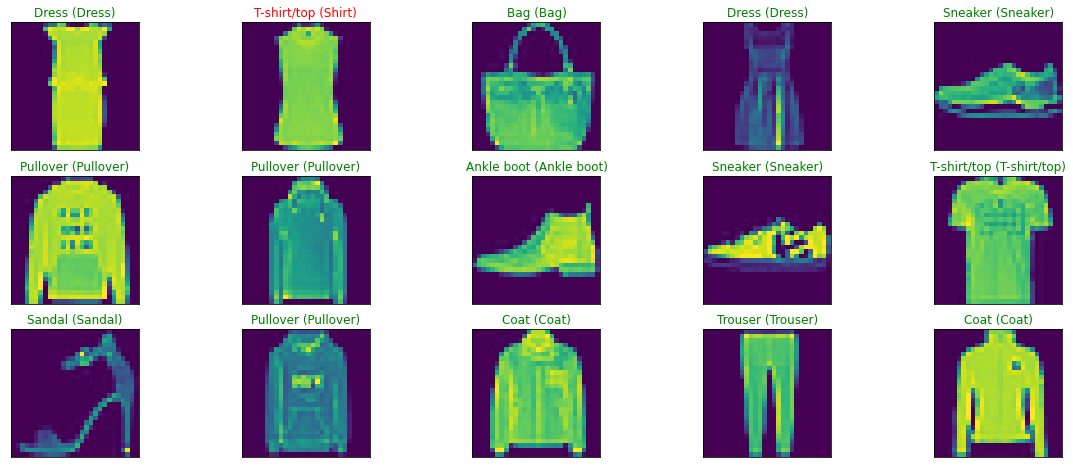

In [35]:
y_hat = model.predict(test_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# **View examples of incorrectly classified test data**

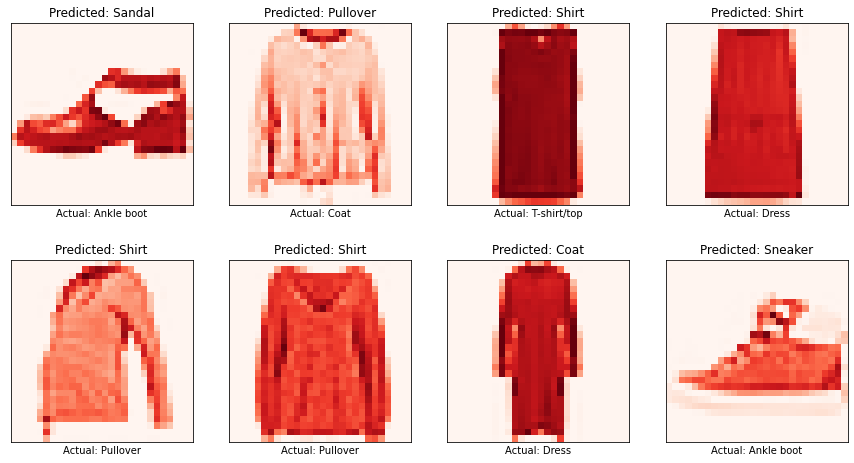

In [30]:
incorrect = np.nonzero(predicted_classes!=test_labels)[0]
# Display the first 8 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[test_labels[incorrect]]))
    

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Plotting The accuracy and validation accuracy**

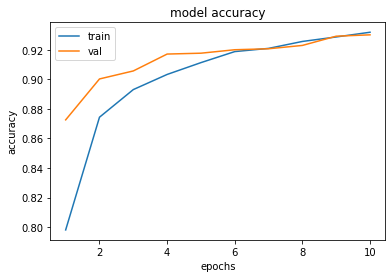

In [32]:
plt.plot(range(1, len(history.history['accuracy'])+1),history.history['accuracy'], label='train_acc')
plt.plot(range(1, len(history.history['val_accuracy'])+1),history.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

# **Plotting The Loss and Validation Loss**

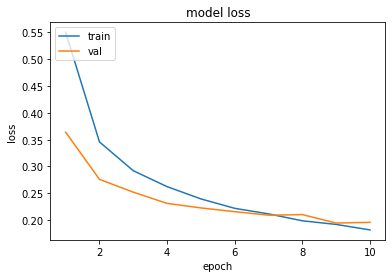

In [33]:
#calling the varaible history on the loss mertics
#calling the variable history on the val_loss metrics 
plt.plot(range(1, len(history.history['loss'])+1),history.history['loss'] , label='train_loss')
plt.plot(range(1, len(history.history['val_loss'])+1), history.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()